## Study a Spin Glass Hamiltonian in terms of Energy spectra, DFT-Functional and Correlations

#### Imports

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from src.graph_utils import create_random_coupling_graph,create_the_hamiltonian_coupling_operator

#### Parameters

In [2]:
n_sites=16
average_coupling=3

#### Create the Random Graph

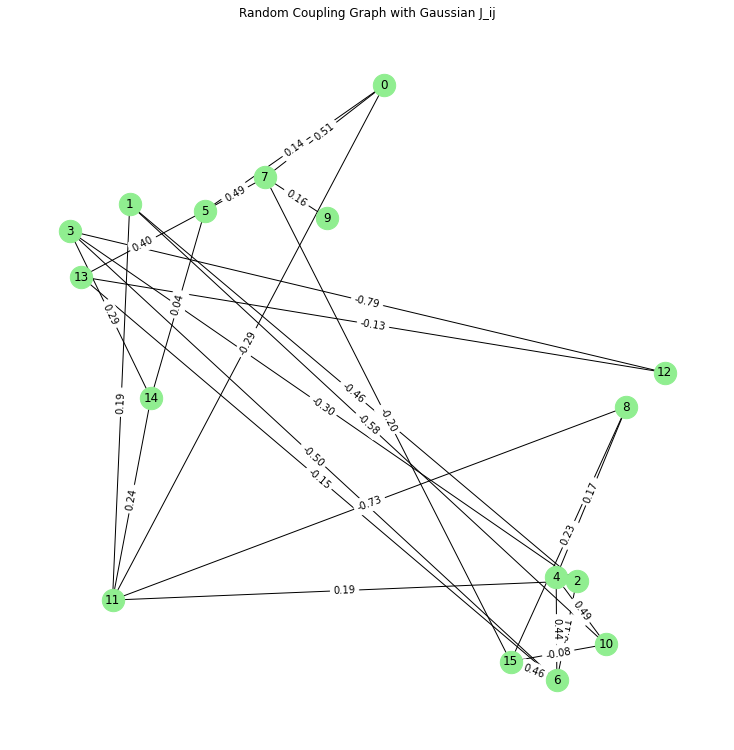

In [3]:
graph=create_random_coupling_graph(num_nodes=n_sites,edge_prob=average_coupling/n_sites,seed=42,)
plt.figure(figsize=(10,10))
pos = nx.spring_layout(graph)
edge_labels = nx.get_edge_attributes(graph, 'weight')
nx.draw(graph, pos, with_labels=True, node_color='lightgreen', node_size=500)
nx.draw_networkx_edge_labels(graph, pos, edge_labels={k: f"{v:.2f}" for k, v in edge_labels.items()})
plt.title("Random Coupling Graph with Gaussian J_ij")
plt.show()

#### Get the adjacency matrix

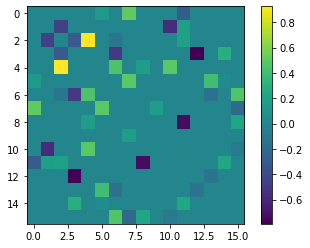

In [4]:
couplings = nx.to_numpy_array(graph, weight='weight') 

np.savez('data/graph_configurations/adjacency_configuration',couplings=couplings)

plt.imshow(couplings)
plt.colorbar()
plt.show()

#### Build-up the spin glass Hamiltonian using Qutip

In [5]:
couplings=np.load('data/graph_configurations/adjacency_configuration.npz')['couplings']

In [6]:
from ManyBodySystemQutip.qutip_class import SpinHamiltonian,SpinOperator

dict_couplings={}
index=[]
values=[]
for a in range(n_sites):
    for b in range(n_sites):
        if couplings[a,b]!=0:
            dict_couplings[(a,b)]=couplings[a,b]
            index.append(('z',a,'z',b))
            values.append(couplings[a,b])

In [7]:
j_hamiltonian_other_algorithm=create_the_hamiltonian_coupling_operator(n_sites=n_sites,couplings=couplings)

In [8]:
print(j_hamiltonian_other_algorithm)

  (0, 0)	2.064298016961416
  (1, 1)	0.4439592514566943
  (2, 2)	-0.22954990780805984
  (3, 3)	-1.8498886733127813
  (4, 4)	1.5891790795790472
  (5, 5)	-0.031159685925673586
  (6, 6)	-0.704668845190427
  (7, 7)	-2.3250076106951485
  (8, 8)	5.74894373351297
  (9, 9)	4.12860496800825
  (10, 10)	3.455095808743495
  (11, 11)	1.8347570432387736
  (12, 12)	4.237710217175041
  (13, 13)	2.6173714516703206
  (14, 14)	1.9438622924055666
  (15, 15)	0.3235235269008452
  (16, 16)	3.6484861826632913
  (17, 17)	2.0281474171585705
  (18, 18)	3.2656546556279236
  (19, 19)	1.6453158901232023
  (20, 20)	3.173367245280924
  (21, 21)	1.5530284797762017
  (22, 22)	2.790535718245556
  (23, 23)	1.1701969527408351
  (24, 24)	7.333131899214845
  (25, 25)	5.712793133710125
  (26, 26)	6.950300372179479
  (27, 27)	5.329961606674759
  (28, 28)	5.821898382876915
  (29, 29)	4.201559617372196
  (30, 30)	5.439066855841551
  (31, 31)	3.81872809033683
  (32, 32)	2.747316734263433
  (33, 33)	0.46273433535445085
  (34, 34)	

In [9]:
j_hamiltonian=SpinOperator(index=index,coupling=values,size=n_sites)




In [10]:
print(j_hamiltonian.qutip_op.data.as_scipy())


  (np.int32(0), np.int32(0))	(2.064298016961416+0j)
  (np.int32(1), np.int32(1))	(0.4439592514566943+0j)
  (np.int32(2), np.int32(2))	(-0.22954990780805984+0j)
  (np.int32(3), np.int32(3))	(-1.8498886733127813+0j)
  (np.int32(4), np.int32(4))	(1.5891790795790472+0j)
  (np.int32(5), np.int32(5))	(-0.031159685925673586+0j)
  (np.int32(6), np.int32(6))	(-0.704668845190427+0j)
  (np.int32(7), np.int32(7))	(-2.3250076106951485+0j)
  (np.int32(8), np.int32(8))	(5.74894373351297+0j)
  (np.int32(9), np.int32(9))	(4.12860496800825+0j)
  (np.int32(10), np.int32(10))	(3.455095808743495+0j)
  (np.int32(11), np.int32(11))	(1.8347570432387736+0j)
  (np.int32(12), np.int32(12))	(4.237710217175041+0j)
  (np.int32(13), np.int32(13))	(2.6173714516703206+0j)
  (np.int32(14), np.int32(14))	(1.9438622924055666+0j)
  (np.int32(15), np.int32(15))	(0.3235235269008452+0j)
  (np.int32(16), np.int32(16))	(3.6484861826632913+0j)
  (np.int32(17), np.int32(17))	(2.0281474171585705+0j)
  (np.int32(18), np.int32(18))

In [11]:
h_hamiltonian=SpinOperator(index=[('x',i) for i in range(n_sites)],coupling=[1]*n_sites,size=n_sites)


print(h_hamiltonian)

(couplings, operator) -> 
 ( 1 ,  ('x', 0) ) 
 ( 1 ,  ('x', 1) ) 
 ( 1 ,  ('x', 2) ) 
 ( 1 ,  ('x', 3) ) 
 ( 1 ,  ('x', 4) ) 
 ( 1 ,  ('x', 5) ) 
 ( 1 ,  ('x', 6) ) 
 ( 1 ,  ('x', 7) ) 
 ( 1 ,  ('x', 8) ) 
 ( 1 ,  ('x', 9) ) 
 ( 1 ,  ('x', 10) ) 
 ( 1 ,  ('x', 11) ) 
 ( 1 ,  ('x', 12) ) 
 ( 1 ,  ('x', 13) ) 
 ( 1 ,  ('x', 14) ) 
 ( 1 ,  ('x', 15) ) 
 



In [12]:
tot_hamiltonian=j_hamiltonian.qutip_op+h_hamiltonian.qutip_op



print(tot_hamiltonian)

Quantum object: dims=[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]], shape=(65536, 65536), type='oper', dtype=CSR, isherm=True
Qobj data =
  (np.int32(0), np.int32(0))	(2.064298016961416+0j)
  (np.int32(0), np.int32(1))	(1+0j)
  (np.int32(0), np.int32(2))	(1+0j)
  (np.int32(0), np.int32(4))	(1+0j)
  (np.int32(0), np.int32(8))	(1+0j)
  (np.int32(0), np.int32(16))	(1+0j)
  (np.int32(0), np.int32(32))	(1+0j)
  (np.int32(0), np.int32(64))	(1+0j)
  (np.int32(0), np.int32(128))	(1+0j)
  (np.int32(0), np.int32(256))	(1+0j)
  (np.int32(0), np.int32(512))	(1+0j)
  (np.int32(0), np.int32(1024))	(1+0j)
  (np.int32(0), np.int32(2048))	(1+0j)
  (np.int32(0), np.int32(4096))	(1+0j)
  (np.int32(0), np.int32(8192))	(1+0j)
  (np.int32(0), np.int32(16384))	(1+0j)
  (np.int32(0), np.int32(32768))	(1+0j)
  (np.int32(1), np.int32(0))	(1+0j)
  (np.int32(1), np.int32(1))	(0.4439592514566943+0j)
  (np.int32(1), np.int32(3))	(1+0j)
  (np.int32(1), np.int32(

In [20]:
import cupy as cp
from cupyx.scipy.sparse import csr_matrix as cp_csr_matrix

from cupyx.scipy.sparse.linalg import eigsh as eigsh_cp
from scipy.sparse import csr_matrix
# Convert to CuPy sparse matrix
tot_hamiltonian_gpu =cp_csr_matrix((tot_hamiltonian.data.as_scipy()))



In [21]:

# Now use eigsh (SciPy will detect and use CuPy!)
es, psis = eigsh_cp(tot_hamiltonian_gpu, k=1, which='SA')  # smallest algebraic

In [18]:
from scipy.sparse.linalg import eigsh
tot_hamiltonian_sparse=tot_hamiltonian.data.as_scipy()




es,psis=eigsh(tot_hamiltonian_sparse,k=1,which='SA')


KeyboardInterrupt: 

In [15]:
print(es)

[-21.62532325]


#### Build up the $Z_i Z_j$ terms

In [16]:
zz_operators={}
for i in range(n_sites):
    for j in range(i,n_sites):
        zz_operators[i,j]=(SpinOperator(index=[('z',i,'z',j)],coupling=[1],size=n_sites).qutip_op.data.as_scipy())



Compute the expectation values

In [17]:
from src.quantum_object_utils import get_zz_dictionary,get_zz_matrix

zz_dictionary=get_zz_dictionary(n_sites=n_sites)

In [18]:
zz_matrix=get_zz_matrix(zz_dictionary,n_sites=n_sites,psi=psis[:,0])
            

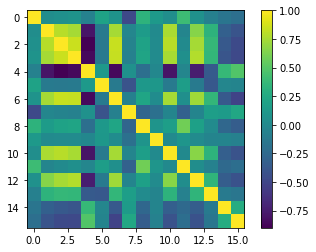

In [ ]:
plt.imshow(zz_matrix)
plt.colorbar()
plt.show()

In [ ]:
energy_j=np.sum(zz_matrix*couplings)
print(energy_j)

#### Build up the density $F_i$ values

In [ ]:
f_operators=[]
for i in range(n_sites):
    f_operators.append(SpinOperator(index=[('x',i)],coupling=[1],size=n_sites).qutip_op.data.as_scipy())


Compute the expectation values

In [ ]:
energy_h=np.zeros(n_sites)

for i,f in enumerate(f_operators):
    energy_h[i]=psis[:,0].conjugate().dot(f.dot(psis[:,0]))

In [ ]:
print(np.sum(energy_h))

In [ ]:
print(np.sum(energy_h)+energy_j)

In [ ]:
plt.plot(energy_h)
plt.show()

##### Check the matrix $M_{ij}$